In [1]:
import requests
import time
import json

# API parameters
API_KEY = "67a5c37a44a81ae54d8a5ad496b96134"  # My OpenWeatherMap API key
LAT = 24.8607  # Latitude for Karachi
LON = 67.0011  # Longitude for Karachi

# Function to convert date to UNIX timestamp
def date_to_unix(date_str):
    return int(time.mktime(time.strptime(date_str, "%Y-%m-%d %H:%M:%S")))

# Set your start and end dates
start_date = "2024-11-1 00:00:00"  # Change as needed
end_date = "2025-01-19 00:00:00"    # Change as needed
start_unix = date_to_unix(start_date)
end_unix = date_to_unix(end_date)

# OpenWeatherMap API endpoint
url = f"http://api.openweathermap.org/data/2.5/air_pollution/history?lat={LAT}&lon={LON}&start={start_unix}&end={end_unix}&appid={API_KEY}"

# Fetch AQI data
response = requests.get(url)

# Check for successful response
if response.status_code == 200:
    data = response.json()
    # Save data to a JSON file
    with open("karachi_aqi_data.json", "w") as f:
        json.dump(data, f, indent=4)
    print("Data fetched and saved to karachi_aqi_data.json")
else:
    print(f"Failed to fetch data. HTTP Status Code: {response.status_code}")


Data fetched and saved to karachi_aqi_data.json


In [2]:
data

{'coord': {'lon': 67.0011, 'lat': 24.8607},
 'list': [{'main': {'aqi': 4},
   'components': {'co': 500.68,
    'no': 0,
    'no2': 12,
    'o3': 61.51,
    'so2': 5.96,
    'pm2_5': 48.48,
    'pm10': 122.15,
    'nh3': 5.13},
   'dt': 1730419200},
  {'main': {'aqi': 4},
   'components': {'co': 614.17,
    'no': 0,
    'no2': 16.11,
    'o3': 58.65,
    'so2': 7.75,
    'pm2_5': 49.04,
    'pm10': 120.81,
    'nh3': 6.71},
   'dt': 1730422800},
  {'main': {'aqi': 4},
   'components': {'co': 1068.12,
    'no': 0,
    'no2': 34.27,
    'o3': 41.13,
    'so2': 10.97,
    'pm2_5': 62.82,
    'pm10': 132.51,
    'nh3': 11.78},
   'dt': 1730426400},
  {'main': {'aqi': 5},
   'components': {'co': 2243.04,
    'no': 13.08,
    'no2': 70.6,
    'o3': 9.48,
    'so2': 17.17,
    'pm2_5': 100.52,
    'pm10': 180.65,
    'nh3': 23.05},
   'dt': 1730430000},
  {'main': {'aqi': 5},
   'components': {'co': 4005.43,
    'no': 68.84,
    'no2': 81.57,
    'o3': 9.39,
    'so2': 25.51,
    'pm2_5': 149.

In [3]:
import pandas as pd
import json
from datetime import datetime

# Load the JSON data from the file
with open("karachi_aqi_data.json", "r") as f:
    data = json.load(f)

# List to store processed data
processed_data = []

# Loop through each data point in the list
for entry in data["list"]:
    # Extract and flatten the required information
    record = {
        "timestamp": datetime.utcfromtimestamp(entry["dt"]).strftime('%Y-%m-%d %H:%M:%S'),  # Convert UNIX timestamp to datetime
        "aqi": entry["main"]["aqi"],
        "co": entry["components"]["co"],
        "no": entry["components"]["no"],
        "no2": entry["components"]["no2"],
        "o3": entry["components"]["o3"],
        "so2": entry["components"]["so2"],
        "pm2_5": entry["components"]["pm2_5"],
        "pm10": entry["components"]["pm10"],
        "nh3": entry["components"]["nh3"]
    }
    processed_data.append(record)

# Convert to DataFrame
df = pd.DataFrame(processed_data)

# Show the first few rows of the DataFrame
print(df.head())


             timestamp  aqi       co     no    no2     o3    so2   pm2_5  \
0  2024-11-01 00:00:00    4   500.68   0.00  12.00  61.51   5.96   48.48   
1  2024-11-01 01:00:00    4   614.17   0.00  16.11  58.65   7.75   49.04   
2  2024-11-01 02:00:00    4  1068.12   0.00  34.27  41.13  10.97   62.82   
3  2024-11-01 03:00:00    5  2243.04  13.08  70.60   9.48  17.17  100.52   
4  2024-11-01 04:00:00    5  4005.43  68.84  81.57   9.39  25.51  149.35   

     pm10    nh3  
0  122.15   5.13  
1  120.81   6.71  
2  132.51  11.78  
3  180.65  23.05  
4  242.41  35.97  


In [4]:
df.shape

(1897, 10)

In [5]:
# Convert 'timestamp' to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extract time-based features
df['hour'] = df['timestamp'].dt.hour + 1
df['day'] = df['timestamp'].dt.day
df['month'] = df['timestamp'].dt.month
df['weekday'] = df['timestamp'].dt.weekday + 1  # Monday=1, Sunday=7


df.drop(columns=['timestamp'], inplace=True)


# Show the updated DataFrame with new features
print(df.head())


   aqi       co     no    no2     o3    so2   pm2_5    pm10    nh3  hour  day  \
0    4   500.68   0.00  12.00  61.51   5.96   48.48  122.15   5.13     1    1   
1    4   614.17   0.00  16.11  58.65   7.75   49.04  120.81   6.71     2    1   
2    4  1068.12   0.00  34.27  41.13  10.97   62.82  132.51  11.78     3    1   
3    5  2243.04  13.08  70.60   9.48  17.17  100.52  180.65  23.05     4    1   
4    5  4005.43  68.84  81.57   9.39  25.51  149.35  242.41  35.97     5    1   

   month  weekday  
0     11        5  
1     11        5  
2     11        5  
3     11        5  
4     11        5  


In [6]:
print(df.describe())


               aqi            co           no          no2           o3  \
count  1897.000000   1897.000000  1897.000000  1897.000000  1897.000000   
mean      4.478651   2273.890337    12.084249    62.429093    68.316832   
std       0.792697   2051.651035    25.933966    52.359441    50.227923   
min       2.000000    327.110000     0.000000     5.270000     0.000000   
25%       4.000000    867.840000     0.000000    24.330000    25.030000   
50%       5.000000   1468.660000     1.100000    43.870000    65.090000   
75%       5.000000   2964.020000     8.610000    85.680000   104.430000   
max       5.000000  13031.010000   227.090000   323.530000   266.080000   

               so2        pm2_5         pm10          nh3         hour  \
count  1897.000000  1897.000000  1897.000000  1897.000000  1897.000000   
mean     28.544254   136.443031   193.926305    23.661060    12.493938   
std      20.181410   108.443210   128.952897    21.753969     6.927220   
min       2.980000     9.570

In [7]:
print(df.isnull().sum())


aqi        0
co         0
no         0
no2        0
o3         0
so2        0
pm2_5      0
pm10       0
nh3        0
hour       0
day        0
month      0
weekday    0
dtype: int64


In [8]:
df.duplicated().sum()

0

In [9]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

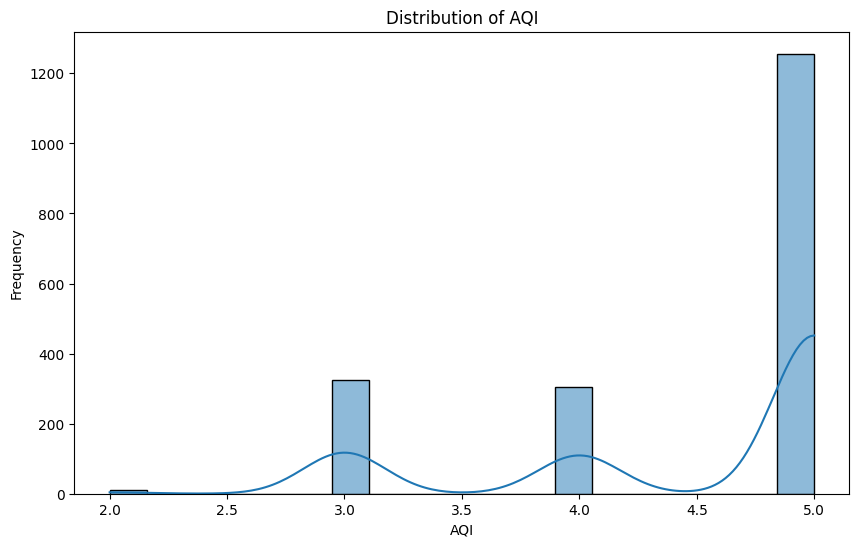

In [10]:

# Distribution of AQI
plt.figure(figsize=(10, 6))
sns.histplot(df['aqi'], kde=True)
plt.title('Distribution of AQI')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.show()


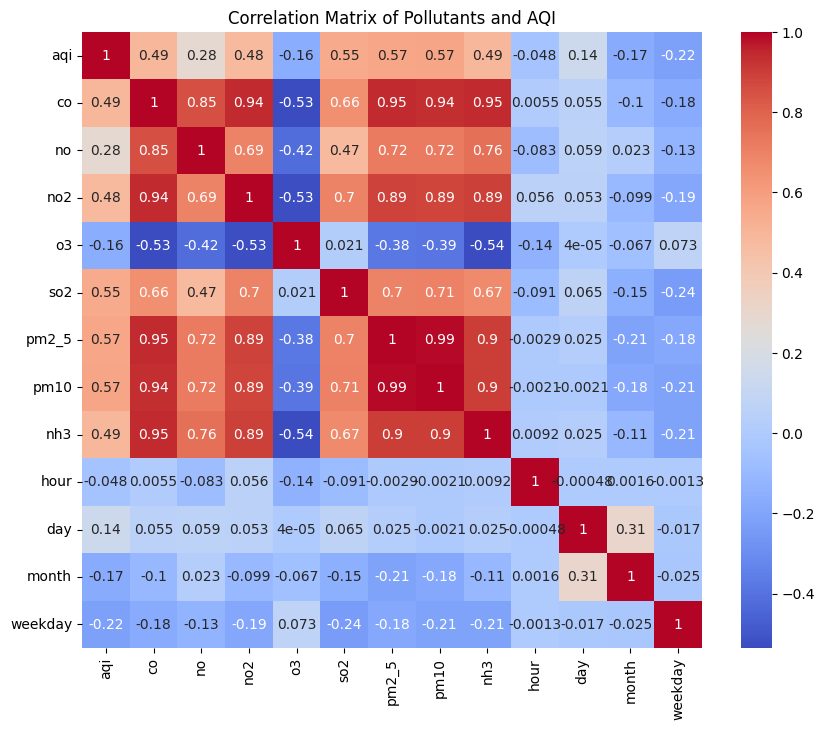

In [11]:
#  Correlation Matrix
correlation_matrix = df[['aqi', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3', 'hour', 'day', 'month', 'weekday']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Pollutants and AQI')
plt.show()


In [12]:
from sklearn.model_selection import train_test_split

# Define features and target
features = ['hour', 'day', 'month', 'weekday', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
target = 'aqi'

# Features (X) and target (y)
X = df[features]
y = df[target]

# Split data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show the shape of the splits
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")


Training set: (1517, 12), Test set: (380, 12)


In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")


Root Mean Squared Error (RMSE): 0.005906315789473685
R² Score: 0.990351690121725


In [14]:
from sklearn.svm import SVR
import numpy as np
svr_model = SVR(kernel='rbf')

# Train the model
svr_model.fit(X_train, y_train)

# Make predictions
y_pred = svr_model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

RMSE: 0.3913590574658443
R² Score: 0.7498011214006968


In [15]:
import xgboost as xgb
# Initialize the XGBoost Regressor model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse')

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

RMSE: 0.07261776507344414
R² Score: 0.9913856983184814


In [16]:
import pickle

# Train your model (replace this with your actual training process)
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Save the model
with open("model.pkl", "wb") as file:
    pickle.dump(model, file)

print("Model saved successfully.")


Model saved successfully.


In [17]:
import joblib

# Save the trained model
joblib.dump(model, 'aqi_prediction_model.pkl')


['aqi_prediction_model.pkl']

In [18]:
print(type(model))

# Optional: Print the loaded object
print(model)


<class 'sklearn.ensemble._forest.RandomForestRegressor'>
RandomForestRegressor()
